In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.patches as mpatches

# Read data and preprocess

In [41]:
bm=pd.read_csv('BM25Ranking_moodl.csv')
q=pd.read_csv('QueryLikelihoodRanking_moodl.csv')
ti=pd.read_csv('TFIDFRanking_moodl.csv')
bmp=pd.read_csv('BM25Ranking_PR_moodl.csv')
qp=pd.read_csv('QueryLikelihoodRanking_PR_moodl.csv')
tip=pd.read_csv('TFIDFRanking_PR_moodl.csv')
#bo=pd.read_csv('BooleanRanking_moodl.csv')

In [43]:
def change_binary(data):
    non_rel=[]
    for x in data.relevance:
        if x>0:
            non_rel.append(1)
        else: 
            non_rel.append(0)
    data['b_relevance']=non_rel
    return data
q=change_binary(q)
bm=change_binary(bm)
ti=change_binary(ti)
#bo=change_binary(bo)
bmp=change_binary(bmp)
qp=change_binary(qp)
tip=change_binary(tip)

In [44]:
frames = [bm,q,ti,bmp,qp,tip]
comb = pd.concat(frames)

In [45]:
comb.relevance.value_counts()

0    168
2     12
Name: relevance, dtype: int64

In [46]:
cl_comb=comb.drop_duplicates()

In [47]:
cl_comb.relevance.value_counts()

0    67
2     2
Name: relevance, dtype: int64

In [48]:
len(cl_comb)

69

there are overall 69 links, where 67 zeros, 0 ones and 2 twos. 

67 non-relevant docs, 2 relevant docs.

# calculate metrics

In [9]:
def pr_curve(retrieved_list,num_pos):
    a=retrieved_list
    #recall= retrieved relevant/retrieved relevant+not retrieved relevant
    recall=[]
    #precision = retrieved relevant/total retrieved
    precision=[]
    #num_pos=sum(t)
    for i in range(1,len(a)):
        recall.append(sum(a[:i])/num_pos)
        precision.append(sum(a[:i])/i)
    a=plt.plot(recall,precision,'-')
    #plt.xlabel('recall')
    #plt.ylabel('precision')
    #plt.show()
    return a


In [37]:
a=pr_curve(bm.b_relevance,2),
b=pr_curve(q.b_relevance,2),
c=pr_curve(ti.b_relevance,2)

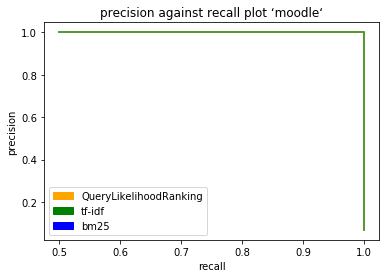

In [38]:
plt.show(b)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision against recall plot ‘moodle‘')
green_patch = mpatches.Patch(color='green', label='tf-idf')
red_patch = mpatches.Patch(color='orange', label='QueryLikelihoodRanking')
blue_patch = mpatches.Patch(color='blue', label='bm25')
plt.legend(handles=[red_patch,green_patch,blue_patch])


# recall, precision, F1

In [18]:

def f1_pr_rc(retrieved_list,num_pos):
    a=retrieved_list
    r=sum(a)/num_pos #recall
    p=sum(a)/len(a) #precision
    F1=2*r*p/(r+p)
    return r,p,F1


In [49]:
q_rpf=f1_pr_rc(q.b_relevance,2)
bm_rpf=f1_pr_rc(bm.b_relevance,2)
ti_rpf=f1_pr_rc(ti.b_relevance,2)
bmp_rpf=f1_pr_rc(bmp.b_relevance,2)
qp_rpf=f1_pr_rc(qp.b_relevance,2)
tip_rpf=f1_pr_rc(tip.b_relevance,2)

In [51]:
bm_rpf,q_rpf,ti_rpf,bmp_rpf,qp_rpf,tip_rpf

((1.0, 0.066666666666666666, 0.125),
 (1.0, 0.066666666666666666, 0.125),
 (1.0, 0.066666666666666666, 0.125),
 (1.0, 0.066666666666666666, 0.125),
 (1.0, 0.066666666666666666, 0.125),
 (1.0, 0.066666666666666666, 0.125))

# Average Precision( AP)

In [21]:
def average_precision(retrieved_list):
    a=retrieved_list
    #a =[1,0,1,1,0,0,1,0,0,1]
    p2=[]
    for i,ai in enumerate(a):
        if ai == 1:
            p2.append(sum(a[:i+1])/(i+1))
    ap=sum(p2)/len(p2)
    return ap

In [22]:
q_ap=average_precision(q.b_relevance)
bm_ap=average_precision(bm.b_relevance)
ti_ap=average_precision(ti.b_relevance)

In [23]:
q_ap,
bm_ap,
ti_ap

1.0

# precision at rank k(1,5,10)

In [24]:
def rank_precision(rank_k,retrieved_list):
    precision=sum(retrieved_list[:rank_k])/rank_k
    return precision

In [25]:
q_k=[rank_precision(1,q.b_relevance),rank_precision(5,q.b_relevance),rank_precision(10,q.b_relevance)]
bm_k=[rank_precision(1,bm.b_relevance),rank_precision(5,bm.b_relevance),rank_precision(10,bm.b_relevance)]
ti_k=[rank_precision(1,ti.b_relevance),rank_precision(5,ti.b_relevance),rank_precision(10,ti.b_relevance)]

In [26]:
q_k,bm_k,ti_k

([1.0, 0.40000000000000002, 0.20000000000000001],
 [1.0, 0.40000000000000002, 0.20000000000000001],
 [1.0, 0.40000000000000002, 0.20000000000000001])

# R rank precision(1,3,5) and reciprocal rank (r=1)

In [27]:
def r_rank(num_rd,retrieved_list):
    a_trans=np.cumsum(retrieved_list)
    a_l = list(a_trans)
    r_precision=num_rd/(a_l.index(num_rd)+1)
    return r_precision

In [28]:
q_r=[r_rank(1,q.b_relevance),r_rank(3,q.b_relevance),r_rank(5,q.b_relevance)]
bm_r=[r_rank(1,bm.b_relevance),r_rank(3,bm.b_relevance),r_rank(5,bm.b_relevance)]
ti_r=[r_rank(1,ti.b_relevance),r_rank(3,ti.b_relevance),r_rank(5,ti.b_relevance)]

ValueError: 3 is not in list

In [29]:
q_r,bm_r,ti_r

NameError: name 'q_r' is not defined

# Search length

all ones

# DCG

In [34]:
def DCG(k,retrieved_list):
    return retrieved_list[0] + np.sum(retrieved_list[1:k] / np.log2(np.arange(2, k + 1)))


In [54]:
DCG(30,bm.relevance),DCG(30, q.relevance),DCG(30,ti.relevance),DCG(30,bmp.relevance),DCG(30,qp.relevance),DCG(30,tip.relevance)

(4.0, 4.0, 4.0, 4.0, 4.0, 4.0)

# Significant level test 